<a href="https://colab.research.google.com/github/lcruse2/Linear-Regression-Model/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM 1

Step 1: load in csv file (assumes google drive is in the directory below)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
Input_data = pd.read_csv('D3.csv')
print(Input_data)

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


Step 2: Create 1-step and all-step linear regression function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def Linear_regression_step(x, y, theta_0, theta_1, alpha):
  h=theta_0 + theta_1*x
  m=np.size(x)
  grad_0 = (1/m)*np.sum(h-y)
  grad_1 = (1/m)*np.sum((h-y)*x)
  theta_0_new = theta_0 - alpha*grad_0
  theta_1_new = theta_1 - alpha*grad_1
  return theta_0_new, theta_1_new, grad_0, grad_1
def Linear_regression_all(x, y, theta_0, theta_1, alpha):
  grad_0 = 1
  grad_1 = 1
  i=0
  J=[]
  h = theta_0 + theta_1*x
  J.append((1/(2*m))*np.sum((h-y)**2))
  theta_0_set = []
  theta_1_set = []
  theta_0_set.append(theta_0)
  theta_1_set.append(theta_1)
  while (np.abs(grad_0) > 0.001) or (np.abs(grad_1) > 0.001):
    theta_0, theta_1, grad_0, grad_1 = Linear_regression_step(x, y, theta_0, theta_1, alpha)
    i+=1
    h = theta_0 + theta_1*x
    J.append((1/(2*m))*np.sum((h-y)**2))
    theta_0_set.append(theta_0)
    theta_1_set.append(theta_1)
  print('number of iterations: ',i)
  iter=np.arange(i+1)
  plt.plot(iter, J)
  plt.plot(iter,theta_0_set)
  plt.plot(iter,theta_1_set)
  plt.legend(['J','theta_0','theta_1'])
  return theta_0 + theta_1*x, theta_0, theta_1

Step 3: Implement linear regression functions for x1

number of iterations:  321
h = 5.923560552750225 + -2.036628659707613 * x
Cost:  0.9849955394102979


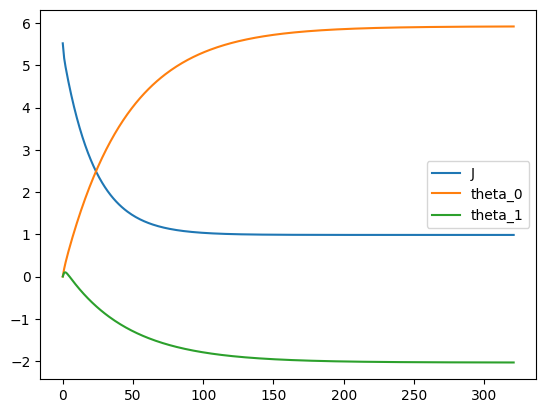

In [ ]:
x1 = Input_data['X1']
y = Input_data['Y']
m=np.size(x1)
h1, theta_01, theta_11 = Linear_regression_all(x1, y, 0, 0, 0.1)
print('h =',theta_01,'+',theta_11,'* x')
J1= (1/(2*m))*np.sum((h1-y)**2)
print('Cost: ', J1)

Step 4: Implement linear regression functions for x2



number of iterations:  207
h = 0.7316998562768613 + 0.5593047862284521 * x
Cost:  3.5993684439314677


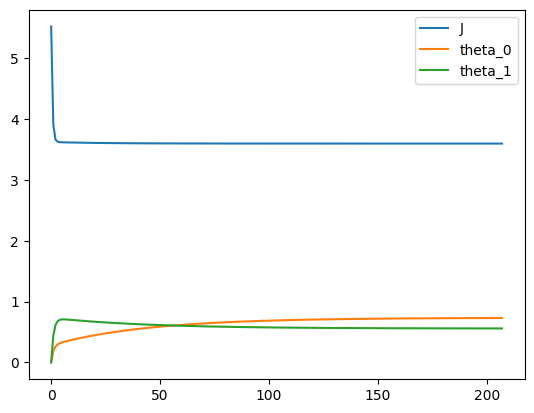

In [ ]:
x2 = Input_data['X2']
y = Input_data['Y']
h2, theta_02, theta_12 = Linear_regression_all(x2, y, 0, 0, 0.1)
print('h =',theta_02,'+',theta_12,'* x')
J2= (1/(2*m))*np.sum((h2-y)**2)
print('Cost: ',J2)

Step 5: Implement linear regression functions for x3

number of iterations:  283
h = 2.8671541513147205 + -0.518794933267626 * x
Cost:  3.6294534925967485


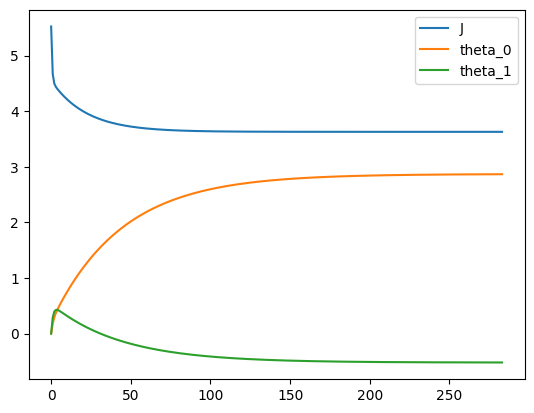

In [ ]:
x3 = Input_data['X3']
y = Input_data['Y']
h3, theta_03, theta_13 = Linear_regression_all(x3, y, 0, 0, 0.1)
print('h =',theta_03,'+',theta_13,'* x')
J3= (1/(2*m))*np.sum((h3-y)**2)
print('Cost: ',J3)

Thus, x1 reduced the cost the most

PROBLEM 2

Step 1: rewrite linear regression functions to work with 3 variables

In [ ]:

def Linear_regression_step_3input(dataset, theta_0, theta_1, theta_2, theta_3, alpha):
  x1 = dataset['X1']
  x2 = dataset['X2']
  x3 = dataset['X3']
  y = dataset['Y']
  m=np.size(x1)
  h=theta_0 + theta_1*x1 + theta_2*x2 + theta_3*x3
  grad_0 = (1/m)*np.sum(h-y)
  grad_1 = (1/m)*np.sum((h-y)*x1)
  grad_2 = (1/m)*np.sum((h-y)*x2)
  grad_3 = (1/m)*np.sum((h-y)*x3)
  theta_0_new = theta_0 - alpha*grad_0
  theta_1_new = theta_1 - alpha*grad_1
  theta_2_new = theta_2 - alpha*grad_2
  theta_3_new = theta_3 - alpha*grad_3
  return theta_0_new, theta_1_new, theta_2_new, theta_3_new, grad_0, grad_1, grad_2, grad_3
def Linear_regression_all_3input(dataset, theta_0, theta_1, theta_2, theta_3, alpha):
  grad_0 = 1
  grad_1 = 1
  grad_2 = 1
  grad_3 = 1
  i=0
  J=[]
  h = theta_0 + theta_1*x1 + theta_2*x2 + theta_3*x3
  J.append((1/(2*m))*np.sum((h-y)**2))
  while (np.abs(grad_0) > 0.001) or (np.abs(grad_1) > 0.001) or (np.abs(grad_2) > 0.001) or (np.abs(grad_3) > 0.001):
    theta_0, theta_1, theta_2, theta_3, grad_0, grad_1, grad_2, grad_3 = Linear_regression_step_3input(dataset, theta_0, theta_1, theta_2, theta_3, alpha)
    i+=1
    h = theta_0 + theta_1*x1 + theta_2*x2 + theta_3*x3
    J.append((1/(2*m))*np.sum((h-y)**2))
  print('number of iterations: ',i)
  iter=np.arange(i+1)
  plt.plot(iter, J)
  plt.legend(['J'])
  return h, theta_0, theta_1, theta_2, theta_3

Step 2: Implement regression functions for x1, x2, and x3 simultaneously

number of iterations:  625
h = 5.30425980902561 + -2.002319689726672 * x1 + 0.5342004665979329 * x2 + -0.26414964739793956 * x3
Cost:  0.7384694701375686


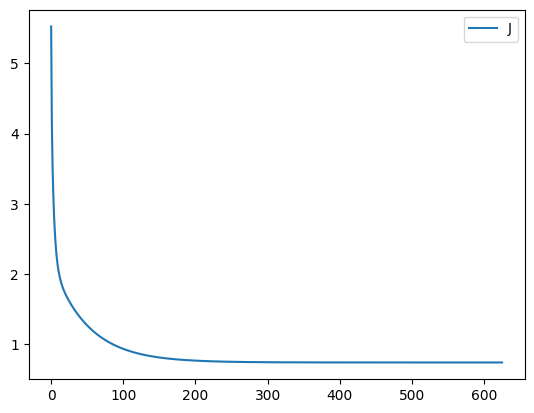

In [ ]:
h, theta_0, theta_1, theta_2, theta_3 = Linear_regression_all_3input(Input_data, 0, 0, 0, 0, 0.1)
print('h =',theta_0,'+',theta_1,'* x1','+',theta_2,'* x2','+',theta_3,'* x3')
J= (1/(2*m))*np.sum((h-y)**2)
print('Cost: ',J)

Step 3: Predict y vals

In [ ]:
x1=1
x2=1
x3=1
h = theta_0 + theta_1*x1 + theta_2*x2 + theta_3*x3
print('(1,1,1): ',h)
x1=2
x2=0
x3=4
h = theta_0 + theta_1*x1 + theta_2*x2 + theta_3*x3
print('(2,0,4): ',h)
x1=3
x2=2
x3=1
h = theta_0 + theta_1*x1 + theta_2*x2 + theta_3*x3
print('(3,2,1): ',h)

(1,1,1):  3.5719909384989315
(2,0,4):  0.24302183998050753
(3,2,1):  0.10155202564351973
